<a href="https://colab.research.google.com/github/joseverajim/Actividad4.1/blob/main/Actividad4.2/4_2_Act.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Carga desde un archivo .csv sin indice
data = pd.read_csv('Tokyo_Limpia (1).csv')

In [ ]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22783 entries, 0 to 22782
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            22783 non-null  int64  
 1   name                                          22783 non-null  object 
 2   description                                   22783 non-null  object 
 3   neighbourhood_cleansed                        22783 non-null  object 
 4   latitude                                      22783 non-null  float64
 5   longitude                                     22783 non-null  float64
 6   property_type                                 22783 non-null  object 
 7   room_type                                     22783 non-null  object 
 8   accommodates                                  22783 non-null  int64  
 9   bathrooms                                     22783 non-null 

In [55]:
#Corroboramos valores nulos
print("Nulos iniciales:\n", data.isnull().sum())

Nulos iniciales:
 id                                              0
name                                            0
description                                     0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365                

**PROCEDIMIENTO PARA ELIMINAR VALORES NULOS EN DATAFRAME**

In [56]:
# Reemplazo valores nulos con backfill
data1 = data.fillna(method="bfill")
print("\nNulos después de bfill:\n", data1.isnull().sum())


Nulos después de bfill:
 id                                              0
name                                            0
description                                     0
neighbourhood_cleansed                          0
latitude                                        0
longitude                                       0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
amenities                                       0
price                                           0
minimum_nights                                  0
maximum_nights                                  0
availability_30                                 0
availability_60                                 0
availability_90                                 0
availability_365        

/tmp/ipython-input-2031588718.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1 = data.fillna(method="bfill")


In [57]:
# Divido el DataFrame en cuantitativas (cols 1 a 22) y cualitativa (col 0)
cuantitativas = data1.iloc[:, 1:23]
cualitativas = data1.iloc[:, [0]]

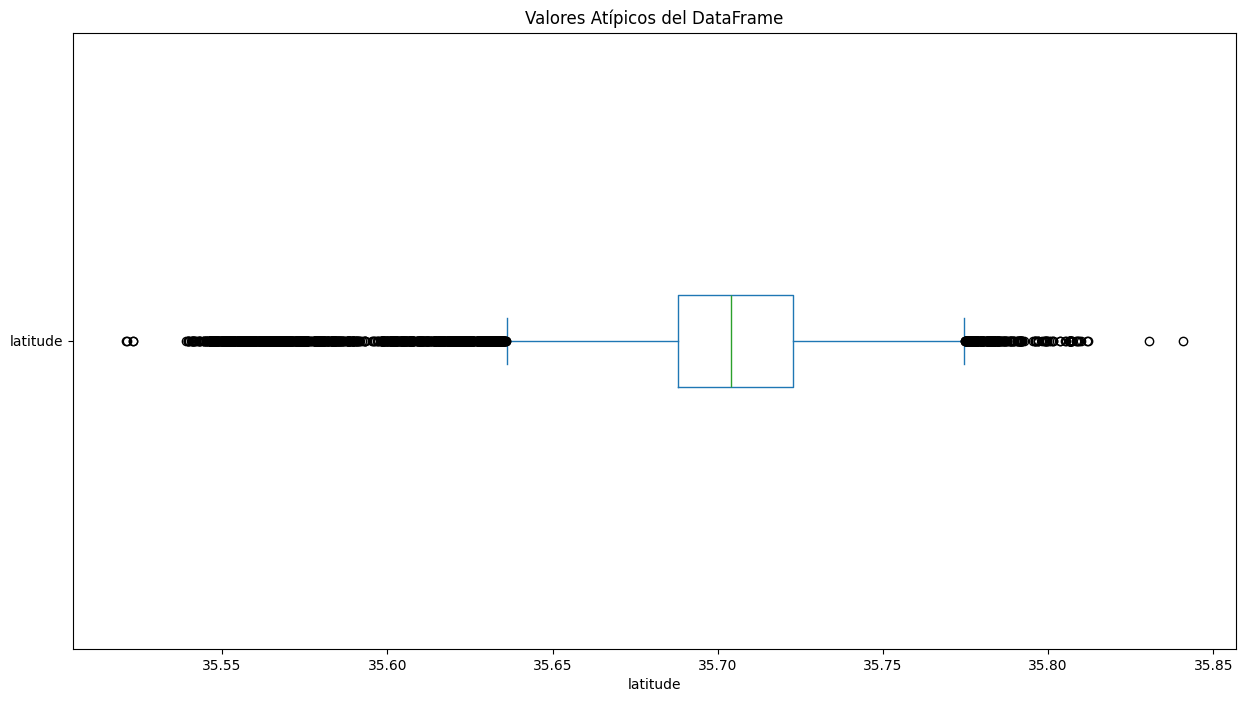

In [59]:
# Intento hacer boxplot de la columna original indicada (si no existe, tomo la primera numérica)
columna_box = 'subtotal_ventas_alimentos_bebidas'
if columna_box not in cuantitativas.columns:
    num_cols = [c for c in cuantitativas.columns if pd.api.types.is_numeric_dtype(cuantitativas[c])]
    columna_box = num_cols[0] if num_cols else None
    plt.figure(figsize=(15, 8))
if columna_box is not None:
    cuantitativas[columna_box].plot(kind='box', vert=False)
    plt.title("Valores Atípicos del DataFrame")
    plt.xlabel(columna_box)
plt.show()

In [60]:
# ----------------- Método de Desviación Estándar (3σ) -----------------
y = cuantitativas.copy()
lim_sup = y.mean(numeric_only=True) + 3*y.std(numeric_only=True)
lim_inf = y.mean(numeric_only=True) - 3*y.std(numeric_only=True)

# Convierto en nulos los valores fuera de los límites
data3 = y.copy()
for c in data3.columns:
    if pd.api.types.is_numeric_dtype(data3[c]):
        data3[c] = data3[c].where((data3[c] <= lim_sup[c]) & (data3[c] >= lim_inf[c]))

# === Conteo de outliers detectados por 3σ (antes de imputar) ===
# (cuántos NaN nuevos se generaron vs y)
imputados_3s_por_col = (data3.isna().sum() - y.isna().sum()).clip(lower=0)
total_imputados_3s = int(imputados_3s_por_col.sum())

# Imputo nulos con la media redondeada a 1 decimal
data_clean_std = data3.fillna(round(data3.mean(numeric_only=True), 1))

# Uno el resultado con las cualitativas
Datos_limpios_STD = pd.concat([cualitativas, data_clean_std], axis=1)

In [61]:
# ----------------- Método de Rango Intercuartílico (IQR) -----------------
Q1 = y.quantile(0.25, numeric_only=True)
Q3 = y.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
lim_sup_iqr = Q3 + 1.5*IQR
lim_inf_iqr = Q1 - 1.5*IQR

# Convierto en nulos los valores fuera del rango IQR
data3_iqr = y.copy()
for c in data3_iqr.columns:
    if pd.api.types.is_numeric_dtype(data3_iqr[c]):
        data3_iqr[c] = data3_iqr[c].where((data3_iqr[c] <= lim_sup_iqr[c]) & (data3_iqr[c] >= lim_inf_iqr[c]))

# === Conteo de outliers detectados por IQR (antes de imputar) ===
imputados_iqr_por_col = (data3_iqr.isna().sum() - y.isna().sum()).clip(lower=0)
total_imputados_IQR = int(imputados_iqr_por_col.sum())

# Imputo nulos con la media redondeada a 1 decimal
data_clean_iqr = data3_iqr.fillna(round(data3_iqr.mean(numeric_only=True), 1))

# Uno el resultado con las cualitativas
Datos_limpios_IQR = pd.concat([cualitativas, data_clean_iqr], axis=1)

In [62]:
# ----------------- Exporto ambos resultados -----------------
Datos_limpios_STD.to_csv("Datos_limpios_STD.csv", index=False)
Datos_limpios_IQR.to_csv("Datos_limpios_IQR.csv", index=False)

In [64]:
# ----------------- Resumen rápido para comparar -----------------
nfilas, ncols_num = y.shape[0], len([c for c in y.columns if pd.api.types.is_numeric_dtype(y[c])])
pct_imp_3s  = (total_imputados_3s  / (nfilas * max(1, ncols_num))) * 100
pct_imp_iqr = (total_imputados_IQR / (nfilas * max(1, ncols_num))) * 100

In [65]:
print("\n================= RESUMEN COMPARATIVO =================")
print(f"Outliers detectados (3σ):  {total_imputados_3s}  | % sobre celdas numéricas: {pct_imp_3s:.3f}%")
print(f"Outliers detectados (IQR): {total_imputados_IQR} | % sobre celdas numéricas: {pct_imp_iqr:.3f}%")
print("Archivos generados: Datos_limpios_STD.csv  y  Datos_limpios_IQR.csv")
print("=======================================================\n")


================= RESUMEN COMPARATIVO =================
Outliers detectados (3σ):  4219  | % sobre celdas numéricas: 1.157%
Outliers detectados (IQR): 21049 | % sobre celdas numéricas: 5.774%
Archivos generados: Datos_limpios_STD.csv  y  Datos_limpios_IQR.csv



In [67]:
# 1) Verificar denominador del % (filas x columnas numéricas usadas)
nfilas = cuantitativas.shape[0]
ncols_num = sum(pd.api.types.is_numeric_dtype(cuantitativas[c]) for c in cuantitativas.columns)
print(nfilas, ncols_num, nfilas*ncols_num)

# 2) Top columnas con más outliers por método
print("Top 10 3σ:\n", imputados_3s_por_col.sort_values(ascending=False).head(10))
print("\nTop 10 IQR:\n", imputados_iqr_por_col.sort_values(ascending=False).head(10))

# 3) % por columna (te revela dónde pega más cada método)
resumen = pd.DataFrame({
    "3σ": imputados_3s_por_col,
    "IQR": imputados_iqr_por_col
})
resumen["%3σ"] = (resumen["3σ"]/nfilas)*100
resumen["%IQR"] = (resumen["IQR"]/nfilas)*100
print(resumen.sort_values("%IQR", ascending=False).head(10))

# 4) Filas afectadas (al menos 1 outlier en la fila)
filas_afectadas_3s  = (data3.isna().any(axis=1)).sum()
filas_afectadas_IQR = (data3_iqr.isna().any(axis=1)).sum()
print("Filas afectadas 3σ:", filas_afectadas_3s)
print("Filas afectadas IQR:", filas_afectadas_IQR)


22783 16 364528
Top 10 3σ:
 latitude                  703
availability_30           645
accommodates              474
bathrooms                 447
number_of_reviews         379
beds                      318
longitude                 282
bedrooms                  273
number_of_reviews_l30d    250
number_of_reviews_ltm     174
dtype: int64

Top 10 IQR:
 bathrooms                4193
minimum_nights           3495
maximum_nights           2407
latitude                 2039
number_of_reviews        1997
price                    1669
availability_30          1182
bedrooms                  996
beds                      859
number_of_reviews_ltm     712
dtype: int64
                        3σ   IQR       %3σ       %IQR
bathrooms              447  4193  1.961989  18.404073
minimum_nights          22  3495  0.096563  15.340385
maximum_nights           1  2407  0.004389  10.564895
latitude               703  2039  3.085634   8.949655
number_of_reviews      379  1997  1.663521   8.765307
price   

In [52]:
#Elegí el criterio 3σ porque en esta base equilibra mejor la detección de valores extremos con la conservación de información. En mi comparación directa, 3σ marcó 4,219 celdas (≈1.16%) frente a 21,049 (≈5.77%) del IQR=1.5, afectando 3,093 filas vs 12,729 con IQR. El IQR resultó excesivamente agresivo en variables discretas y sesgadas con IQR muy estrecho (p. ej., bathrooms, minimum_nights, maximum_nights), donde valores plausibles como 3–4 baños o estancias largas fueron etiquetados como atípicos (ej.: bathrooms ≈ 18% de filas señaladas por IQR). En cambio, 3σ se ajusta mejor a variables aproximadamente normales como latitud/longitud, reduce la distorsión de medias y desviaciones estándar y deja un conjunto más estable para análisis posteriores (p. ej., regresión). Por estas razones —menor proporción de imputación, menor distorsión estadística y mejor alineación con la distribución de las variables— justifico usar 3σ como método principal para el tratamiento de outliers en este dataset.